# MICRO-PROYECTO2 (12%) - CLUSTERING

## Integrantes





*   Hinara Pastora Sánchez Mata
*   Anna Ospina Bedoya
*   Juan José Tobón Zapata

##Context

###Problem Statement

Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company's database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

##Content


###People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

###Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

###Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

###Place

- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to companyâ€™s web site in the last month

###Target

Need to perform clustering to summarize customer segments.

## Preprocesamiento

Importamos librerías necesarias.

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

Para tenerlo en cuenta, los datos estaban separados por tabulación, entonces hicimos preprocesamiento de datos en excel en donde se utilizo una funcion avanzada para poner el texto en columnas

In [ ]:
import pandas as pd

customer_df = pd.read_csv("marketing_campaign.csv",delimiter=';')
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Exploramos los últimos 5 datos del dataset

In [ ]:
customer_df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Cada registro tiene 29 columnas, para saber la cantidad de columnas y filas hicimos uso de la funcion `.shape`

In [ ]:
customer_df.shape

(2240, 29)

Buscamos los valores nulos y los sumamos por columnas

In [ ]:
customer_df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Se eliminan los registros nulos para un total de 24

In [ ]:
customer_df = customer_df.dropna()
customer_df.isna().sum()
customer_df.shape

(2216, 29)

Eliminamos columnas que no estaban en el enunciado

In [ ]:
customer_df = customer_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

Mostramos los primeros 5 registros del dataset después de los procedimientos previos

In [ ]:
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,3,6,5,0,0,0,0,0,0,0


Mezclamos los datos de manera aleatoria

In [ ]:
customer_df = customer_df.sample(frac=1).reset_index(drop=True)
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1524,1983,2n Cycle,Single,81698.0,0,0,1/03/2013,1,709,...,2,5,5,0,0,0,1,0,0,1
1,2607,1953,Graduation,Single,40464.0,0,1,11/01/2013,78,424,...,2,8,8,0,0,0,0,0,0,0
2,523,1989,Graduation,Married,37155.0,1,0,31/01/2013,51,23,...,0,4,5,0,0,0,0,0,0,0
3,378,1971,Graduation,Married,52531.0,0,0,30/12/2012,68,283,...,2,10,6,0,0,0,0,0,0,0
4,3537,1981,Graduation,Together,31089.0,1,0,17/08/2012,57,31,...,0,4,8,0,0,0,0,0,0,0


Mapeamos los valores posibles de educación y lo convertimos a datos numéricos

In [ ]:
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}
customer_df['Education'] = customer_df['Education'].map(education_mapping)
customer_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1524,1983,2,Single,81698.0,0,0,1/03/2013,1,709,...,2,5,5,0,0,0,1,0,0,1
1,2607,1953,3,Single,40464.0,0,1,11/01/2013,78,424,...,2,8,8,0,0,0,0,0,0,0
2,523,1989,3,Married,37155.0,1,0,31/01/2013,51,23,...,0,4,5,0,0,0,0,0,0,0
3,378,1971,3,Married,52531.0,0,0,30/12/2012,68,283,...,2,10,6,0,0,0,0,0,0,0
4,3537,1981,3,Together,31089.0,1,0,17/08/2012,57,31,...,0,4,8,0,0,0,0,0,0,0


Mapeamos los valores posibles de estado marital y lo convertimos a datos numéricos

In [ ]:
marital_mapping = {
    'Single': 1,
    'Together': 2,
    'Married': 3,
    'Divorced': 4,
    'Widow': 5,
    'Alone': 6,
    'Absurd': 7,
    'YOLO': 8
}
customer_df['Marital_Status'] = customer_df['Marital_Status'].map(marital_mapping)
customer_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1524,1983,2,1,81698.0,0,0,1/03/2013,1,709,...,2,5,5,0,0,0,1,0,0,1
1,2607,1953,3,1,40464.0,0,1,11/01/2013,78,424,...,2,8,8,0,0,0,0,0,0,0
2,523,1989,3,3,37155.0,1,0,31/01/2013,51,23,...,0,4,5,0,0,0,0,0,0,0
3,378,1971,3,3,52531.0,0,0,30/12/2012,68,283,...,2,10,6,0,0,0,0,0,0,0
4,3537,1981,3,2,31089.0,1,0,17/08/2012,57,31,...,0,4,8,0,0,0,0,0,0,0


## 1. Exploración de los datos

Analizamos el dataset para encontrar las características más representativas

In [ ]:
data=customer_df.drop(columns=['ID', 'Dt_Customer'])  # Eliminamos columnas no numéricas o identificadores

# Estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Agrupamiento usando KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1000)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Random Forest para importancia de características
rf = RandomForestClassifier(n_estimators=100, random_state=1000)
rf.fit(data.drop('Cluster', axis=1), data['Cluster'])

# Obtener importancias de características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.columns

# Mostrar las características
for f in range(25):
    print(f"{f + 1}. Feature {features[indices[f]]} ({importances[indices[f]]})")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1. Feature MntWines (0.1692384285136956)
2. Feature Income (0.11666534689417236)
3. Feature MntMeatProducts (0.10896610308347748)
4. Feature NumStorePurchases (0.1024367906366161)
5. Feature NumCatalogPurchases (0.0711136548912061)
6. Feature MntFishProducts (0.06546838100634493)
7. Feature Teenhome (0.0594090057585426)
8. Feature NumDealsPurchases (0.057389668787833976)
9. Feature NumWebPurchases (0.05540219854611589)
10. Feature MntSweetProducts (0.04452090007472088)
11. Feature MntFruits (0.04107886626159241)
12. Feature NumWebVisitsMonth (0.025994851503836472)
13. Feature Kidhome (0.02110324512179025)
14. Feature MntGoldProds (0.016003598613965598)
15. Feature Year_Birth (0.014592965442702175)
16. Feature Recency (0.009535596085465746)
17. Feature AcceptedCmp5 (0.0057662160993236945)
18. Feature Marital_Status (0.0040968380028520044)
19. Feature Education (0.003492232407096594)
20. Feature AcceptedCmp1 (0.002559823839472254)
21. Feature Response (0.002394840165498337)
22. Feature A

En el enunciado, la descripción de los datos fue dada en segmentos de características: "People", "Products", "Promotion" y "Place". Como queremos clasificar a los clientes decidimos seleccionar las características más representativas de cada uno de estos segmentos (Excluyendo "Promotion" ya que sus datos son binarios)

Matriz de correlación

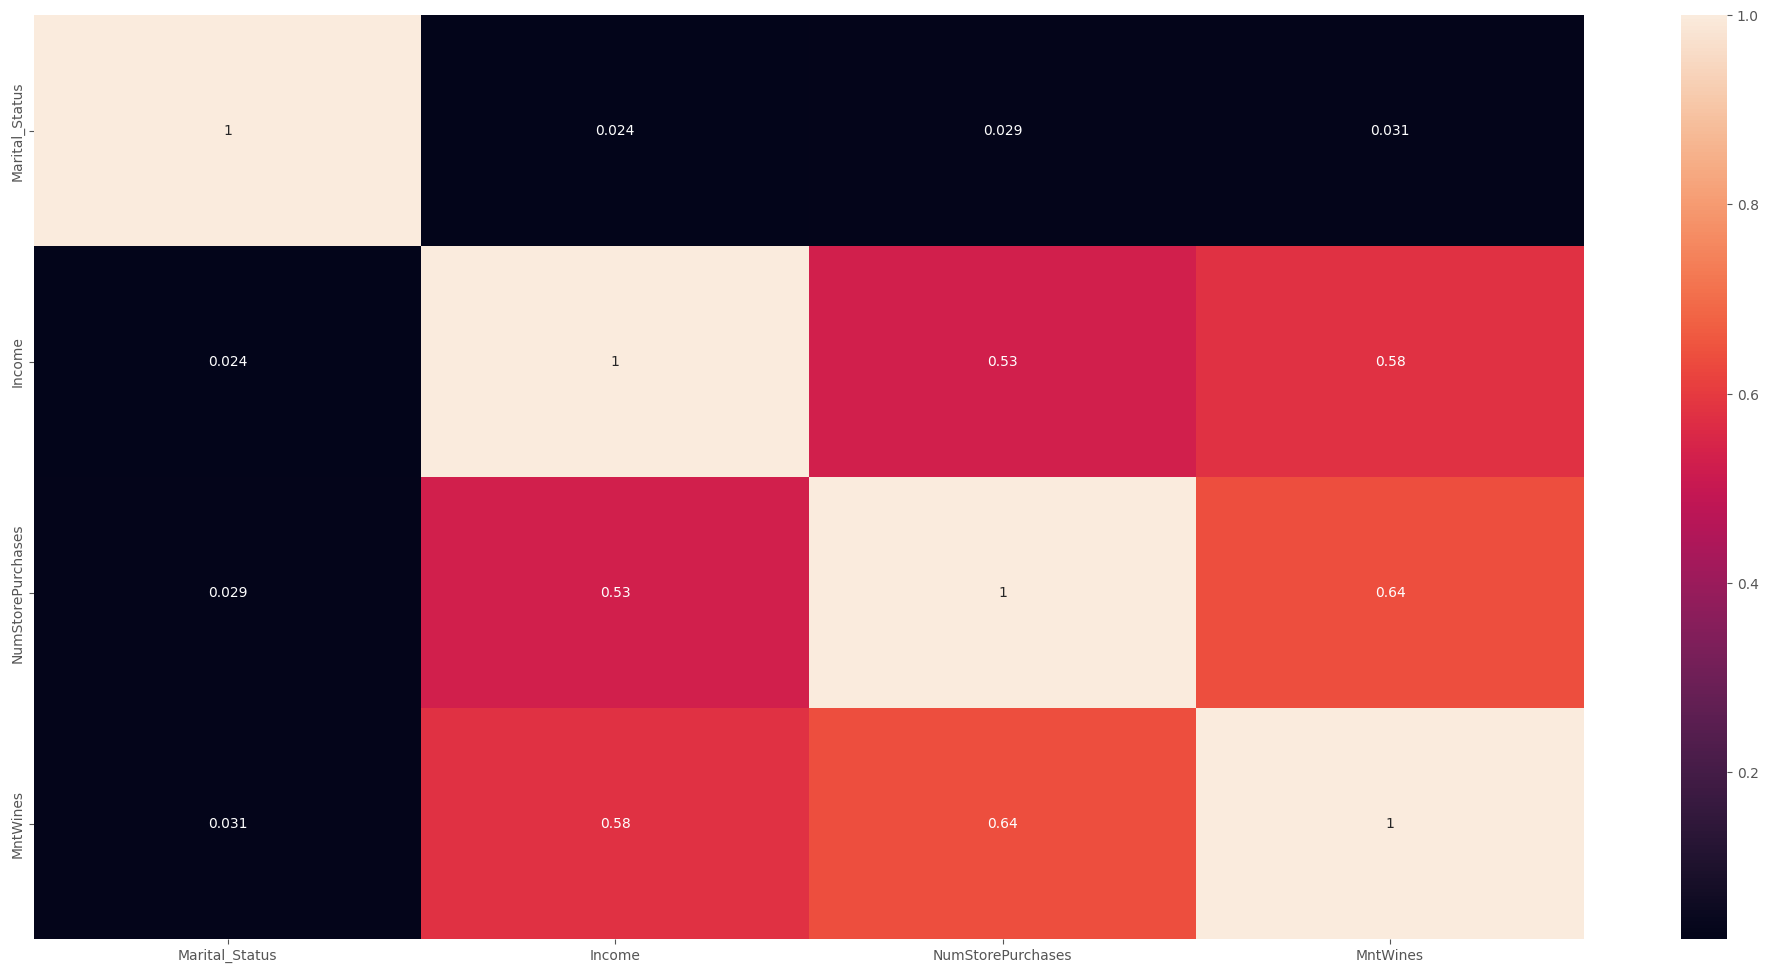

In [ ]:
data=data[['Marital_Status', 'Income', 'NumStorePurchases', 'MntWines']]
corrMatrix = data.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

Muestra de 300 datos con semilla 9

In [ ]:
selected = pd.DataFrame(customer_df,columns=('Marital_Status','Income', 'NumStorePurchases', 'MntWines')).sample(n=300, random_state=57)
print(selected)


      Marital_Status   Income  NumStorePurchases  MntWines
394                3  50437.0                  8       370
2135               1  31878.0                  4        23
1683               3  17688.0                  2         2
2131               2  40706.0                  4        59
1878               4  15287.0                  2         1
...              ...      ...                ...       ...
586                1  74293.0                  6       375
1492               5  70165.0                 11       161
914                1  49389.0                  3        40
1867               1  39190.0                  4        68
1142               1  60689.0                 10       240

[300 rows x 4 columns]


Definimos un arreglo en donde guardamos los datos de las 3 variables más representativas

In [ ]:
train = np.array(selected[['Marital_Status','Income', 'NumStorePurchases', 'MntWines']])
train_labels = np.array(selected['Marital_Status'])
print(train.shape)

(300, 4)


Encontramos y eliminamos los datos atípicos

In [ ]:
# Encontramos y eliminamos los datos atípicos
outliers = []
for i in range(train.shape[1]-1):
  valores = train[:,i]
  Q1 = np.percentile(valores, 25)
  Q3 = np.percentile(valores, 75)
  RSI = Q3 - Q1
  limite_inferior = Q1 - 1.5 * RSI
  limite_superior = Q3 + 1.5 * RSI
  outliers.extend(np.where((valores < limite_inferior) | (valores > limite_superior))[0])

# Eliminamos los outliers
selected = np.delete(train, outliers, axis=0)
train_labels_sin_outliers = np.delete(train_labels, outliers, axis=0)

print(selected.shape)
selected = pd.DataFrame(selected,columns=('Marital_Status','Income', 'NumStorePurchases', 'MntWines'))
selected.head()

(290, 4)


,Marital_Status,Income,NumStorePurchases,MntWines
0,3.0,50437.0,8.0,370.0
1,1.0,31878.0,4.0,23.0
2,3.0,17688.0,2.0,2.0
3,2.0,40706.0,4.0,59.0
4,4.0,15287.0,2.0,1.0


Graficamos para ver las 3 características

In [ ]:
fig = px.scatter_3d(selected,'Income', 'NumStorePurchases', 'MntWines')
fig.show()

Se obtienen las estadisticas descriptivas de las variables escogidas sin estado marital

In [ ]:
selected.describe().drop('Marital_Status', axis=1)

,Income,NumStorePurchases,MntWines
count,290.000000,290.000000,290.000000
mean,51135.448276,5.427586,287.265517
std,20522.174258,3.109857,340.428676
min,7500.000000,2.000000,1.000000
25%,35563.250000,3.000000,23.000000
50%,49128.000000,4.000000,136.500000
75%,66412.750000,7.000000,454.000000
max,105471.000000,13.000000,1396.000000


También podemos usar una matriz de dispersión para ver cómo se relacionan los datos.

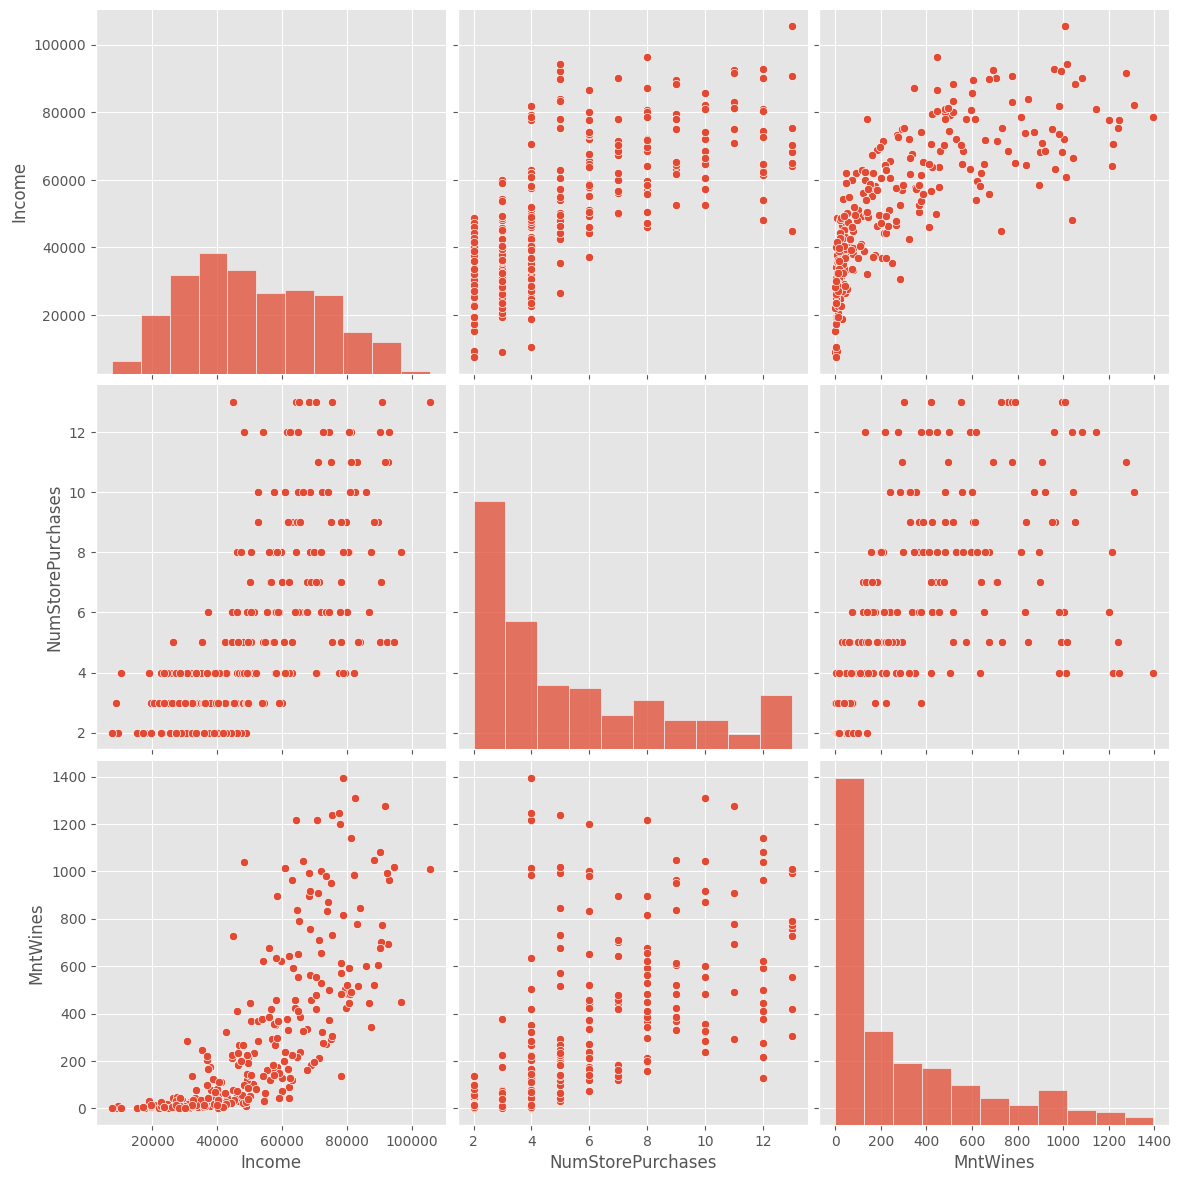

In [ ]:
sb.pairplot(selected.dropna(),
            height=4,
            vars=['Income', 'NumStorePurchases', 'MntWines'],
            kind='scatter')
plt.show()

## 2. Cantidad óptima de clusters

Usamos las 3 variables y los convertimos en numpy array

In [ ]:
customer_3D = np.array(selected[['Income', 'NumStorePurchases', 'MntWines']])
customer_3D_labels = np.array(selected['Marital_Status'])
print(customer_3D.shape)

(290, 3)


### Elbow Curve

Se utiliza el método de la curva Elbow para determinar el número óptimo de clusters al calcular la suma de los errores cuadráticos (SSE) para diferentes valores de k.

In [ ]:
# se define la cantidad de clusters con los que se quiere probar
maxClusters = 10

In [ ]:
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(customer_3D)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

Valores:  [121748630377.25859, 33859677111.374817, 17337441624.81571, 10143876182.012053, 6975712806.527022, 4751927680.547341, 3650080547.2805376, 2713441382.429993, 2177864603.5563407, 1685555973.9450471]


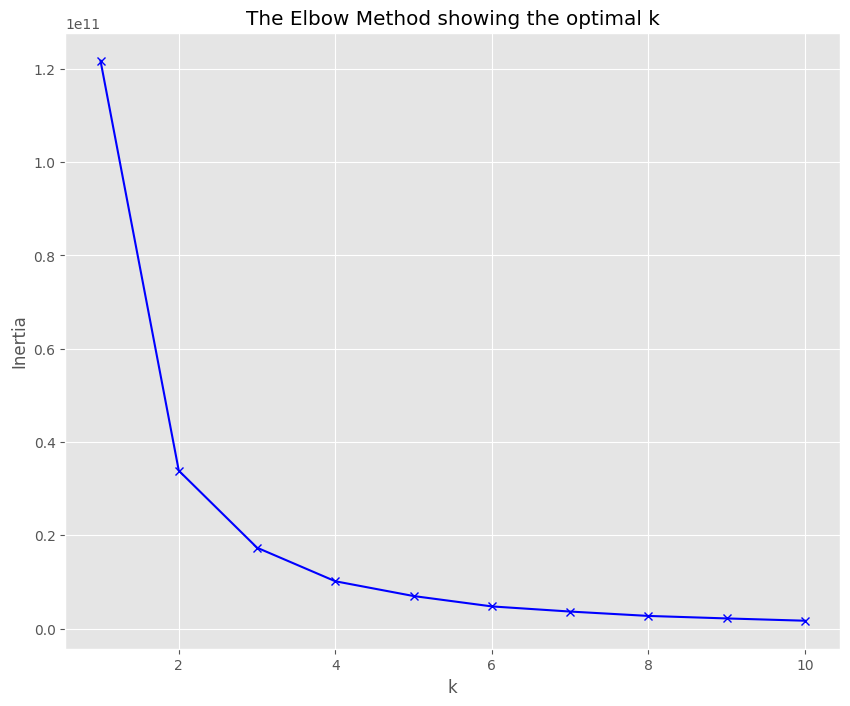

In [ ]:
elbow_curve(customer_3D, maxClusters = 10)

Se eligió k = 3 como el número óptimo de clusters, ya que no hay una mejoria muy significativa cuando se reduce la inercia.

### Estadístico de GAP

Se utiliza el método del estadístico de Gap para determinar el número óptimo de clusters. Este método compara la inercia de los datos originales con la inercia de conjuntos de datos aleatorios de referencia.

Para cada valor de k (número de clusters), se generan nrefs conjuntos de datos aleatorios. Se calcula la inercia para cada conjunto y se compara con la inercia del conjunto de datos original.

In [ ]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):

            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap

        resultsdf = resultsdf._append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve
    # su respectivo número de clusters
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [ ]:
k, gapdf = optimalK(customer_3D, nrefs=5, maxClusters=10)
print('La cantidad óptima de clusters es: ', k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

La cantidad óptima de clusters es:  10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



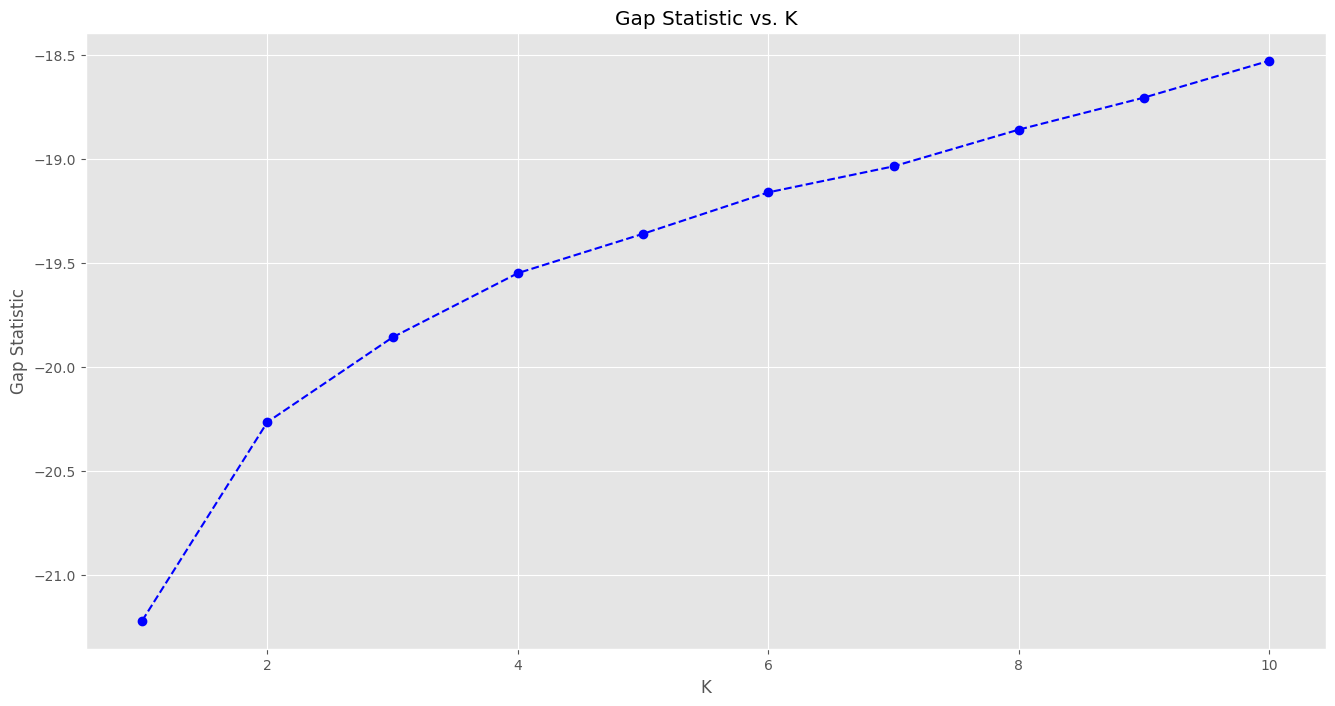

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

Obtenemos como resultado que el estadístico de GAP no es concluyente ya que no muestra un cambio significativo (No presenta disminución en ningún punto)

### Coeficiente de Silueta

Se utiliza el análisis de silueta para evaluar la calidad de los clusters formados por el algoritmo K-means, variando el número de clusters (n_clusters) desde 2 hasta 6.

Para cada número de clusters, se genera un gráfico de silueta que muestra la coherencia de los clusters. Los valores de silueta pueden oscilar entre -1 y 1, y los gráficos están organizados de manera que se pueda observar la densidad y separación de cada cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.6180659250193513
For n_clusters = 3 The average silhouette_score is : 0.5623034676476618


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.5482759127605845
For n_clusters = 5 The average silhouette_score is : 0.5342751013348441


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_score is : 0.551880079074536


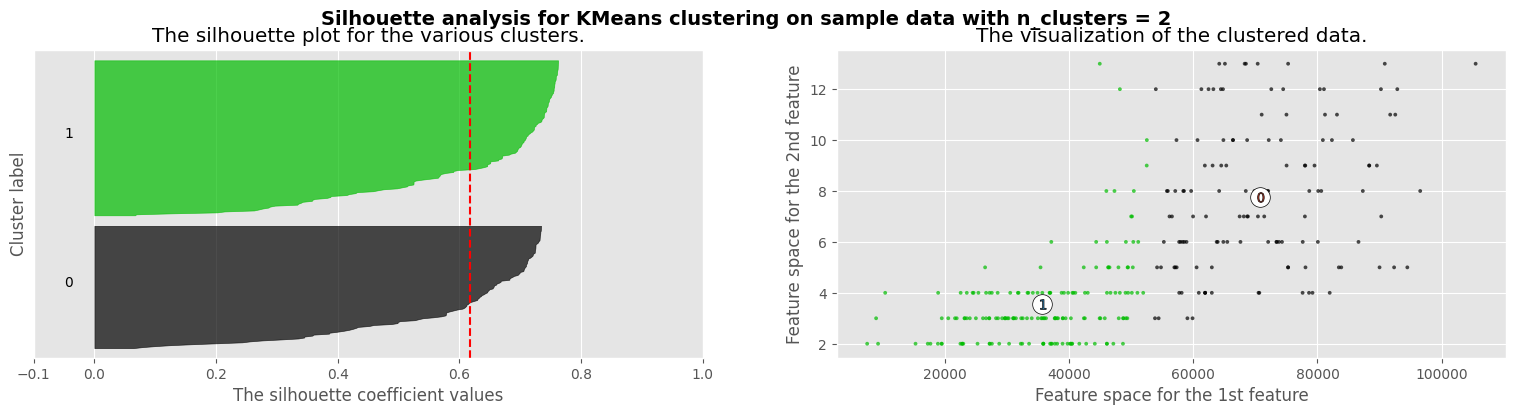

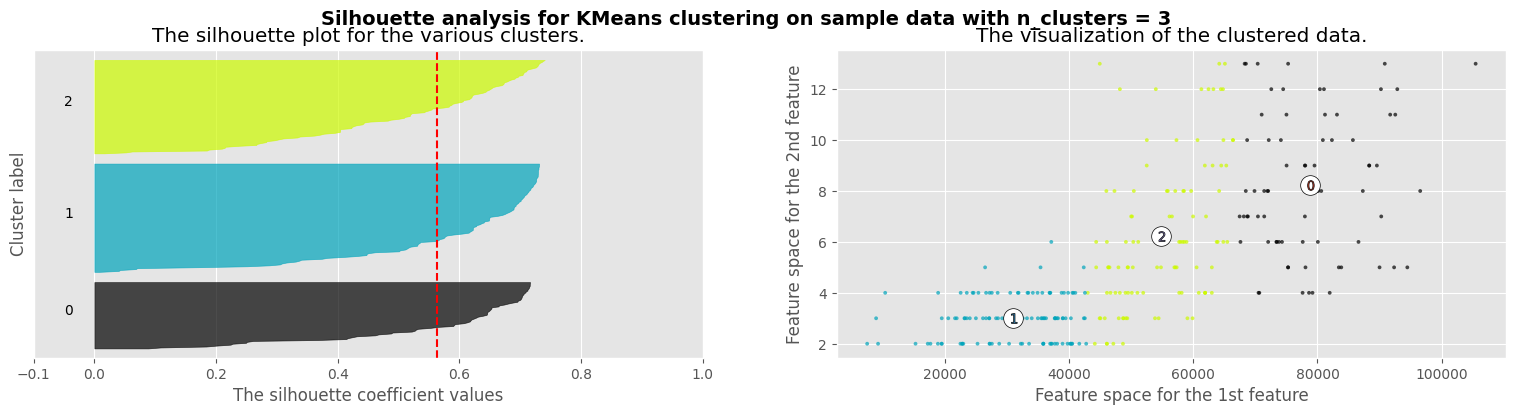

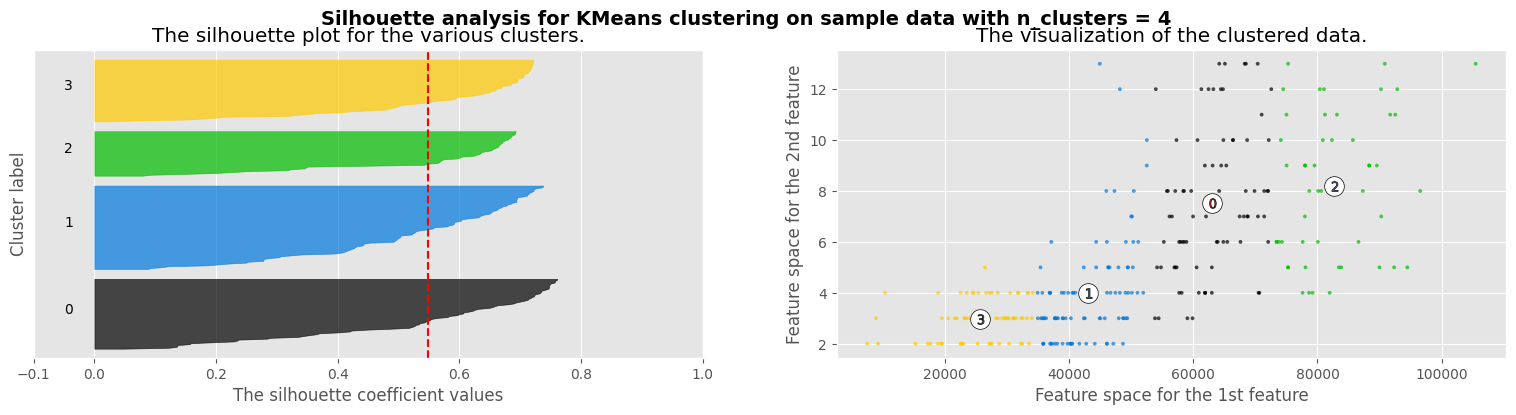

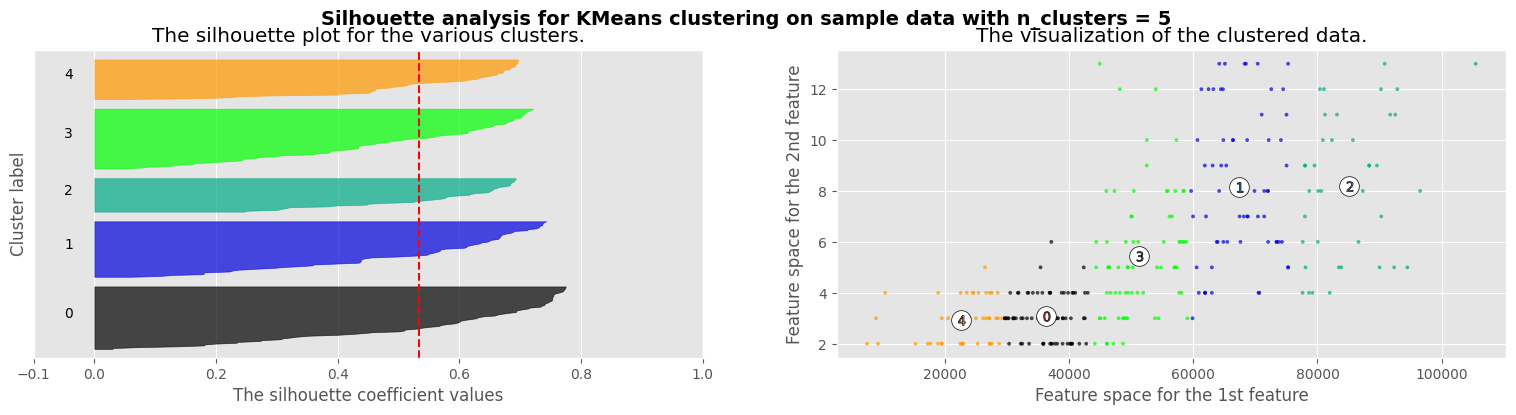

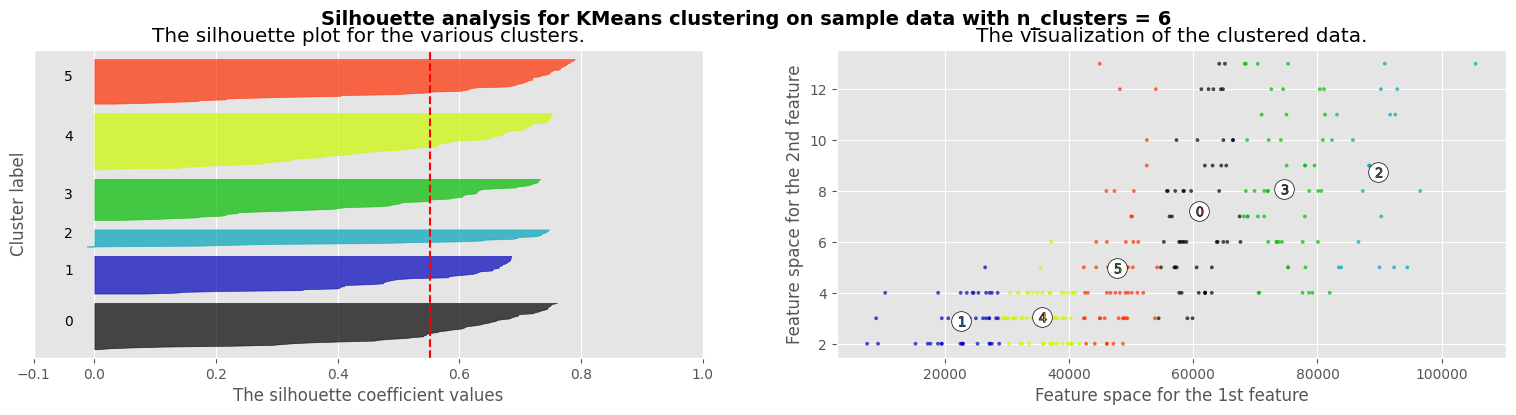

In [ ]:
colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6]
X = customer_3D

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Podemos ver que los puntajes mas altos se obtuvieron del segundo al tercer cluster, pero se observa que los datos estan repartidos de forma mas equilibrada para k = 3, por lo tanto este sera el óptimo.

Entonces usamos k-means con k = 3.

Ajustamos un modelo K-means con 3 clusters al conjunto de datos customer, utilizando un máximo de 1000 iteraciones. Los labels asignados a cada punto y los centroides de los clusters se almacenan en labels_3D y centroids_3D, respectivamente.**bold text**

In [ ]:
kmeans_model_3D = KMeans(n_clusters=3, max_iter=1000).fit(customer_3D)
labels_3D = kmeans_model_3D.labels_
centroids_3D = kmeans_model_3D.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Generamos una visualización 3D de los clusters obtenidos con el modelo K-means aplicado al conjunto de datos customer.

In [ ]:
X = customer_3D  # Tu conjunto de datos

# Ajustar el modelo K-means
k = 3
kmeans_model_3D = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X)
labels_3D = kmeans_model_3D.labels_
centroids_3D = kmeans_model_3D.cluster_centers_

# Crear un DataFrame para Plotly con los datos y las etiquetas
df = pd.DataFrame(X, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
df['Cluster'] = labels_3D

# Crear un DataFrame para los centroides
centroids_df = pd.DataFrame(centroids_3D, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
centroids_df['Cluster'] = ['Centroid ' + str(i) for i in range(k)]

# Graficar los puntos de datos y los centroides en 3D
fig = px.scatter_3d(df, x='Cluster 1', y='Cluster 2', z='Cluster 3', color='Cluster',
                    color_discrete_map={str(i): colors_k_means[i] for i in range(k)},
                    title='3D K-means Clustering')

# Añadir los centroides a la gráfica
fig.add_scatter3d(x=centroids_df['Cluster 1'], y=centroids_df['Cluster 2'], z=centroids_df['Cluster 3'],
                  mode='markers+text', marker=dict(size=10, color='red'), text=centroids_df['Cluster'],
                  textposition='top center', name='Centroids')

# Mostrar la gráfica
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## 3. Dendograma

Se utilizó el método de enlace Ward para calcular el dendrograma, que muestra cómo se agrupan los puntos a diferentes niveles de distancia.

**Línea de Corte:** Se añade una línea horizontal en una altura específica (cut_height) para visualizar el nivel de corte en el dendrograma.

Y se eligió una altura de 11 para cortar el dendrograma y se obtuvieron 3 clusters, coincidiendo con el número de clusters definidos en el algoritmo K-means.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_3D)

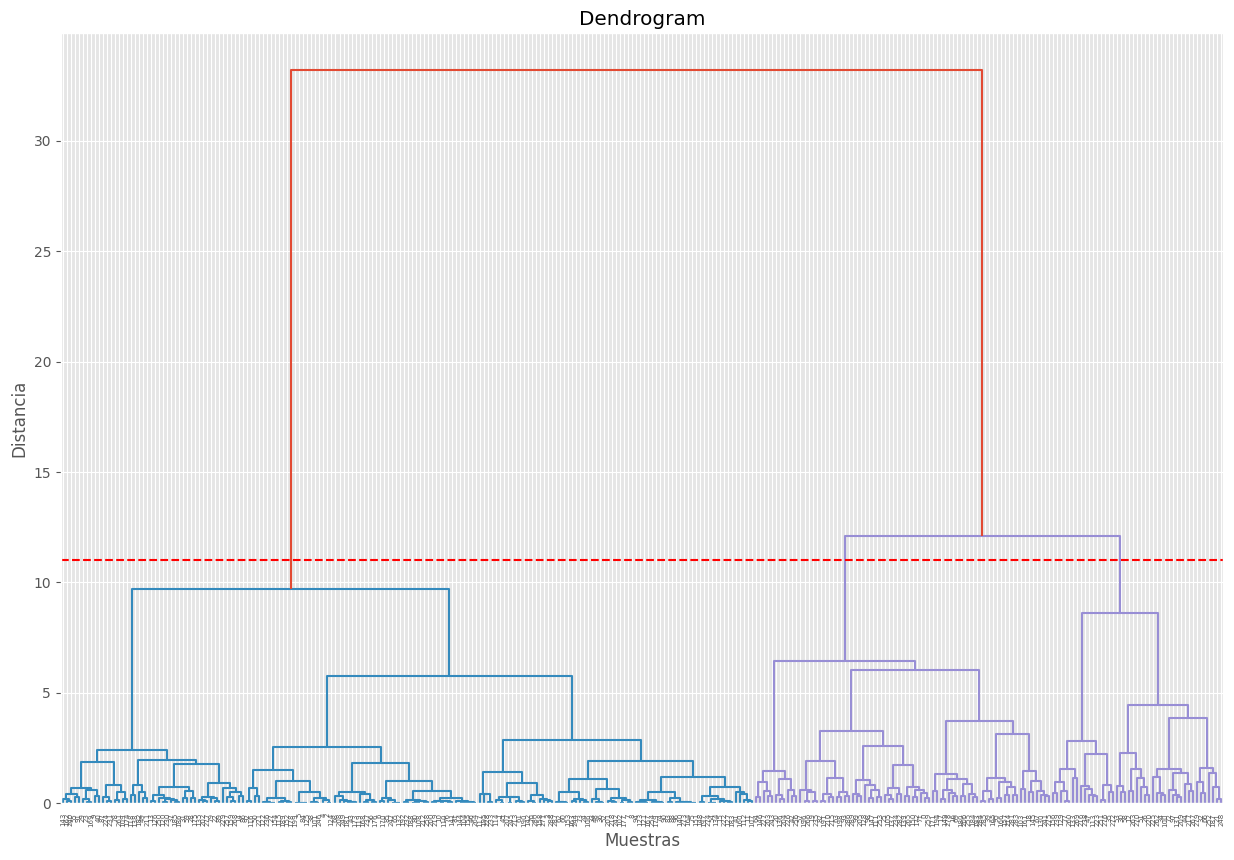

In [ ]:
# Calcular el dendrograma
dist_matrix = sch.distance.pdist(X_scaled)
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Añadir línea de corte en el dendrograma
cut_height = 11
plt.axhline(y=cut_height, color='r', linestyle='--')

plt.title('Dendrogram')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

Definimos el número de clusters y aplicar el clustering aglomerativo

In [ ]:
# Definir el número de clusters
k = 3
# Aplicar clustering aglomerativo
agglo = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)
aglomerativo = selected.copy()
aglomerativo['agglo_labels'] = agglo_labels

# Evaluar la calidad del clustering usando la puntuación de silueta
silhouette_avg_agglo = silhouette_score(X_scaled, agglo_labels)
print(f"Silhouette Score para clustering aglomerativo: {silhouette_avg_agglo:.2f}")

Silhouette Score para clustering aglomerativo: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Graficamos el cluster aglomerativo

In [ ]:
X = customer_3D  # Tu conjunto de datos
k = 3

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar clustering aglomerativo
agglo = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Crear un DataFrame para plotly
df = pd.DataFrame(X_scaled, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
df['Cluster'] = agglo_labels

# Evaluar la calidad del clustering usando la puntuación de silueta
silhouette_avg_agglo = silhouette_score(X_scaled, agglo_labels)
print(f"Silhouette Score para clustering aglomerativo: {silhouette_avg_agglo:.2f}")

# Graficar el clustering aglomerativo en 3D
fig = px.scatter_3d(df, x='Cluster 1', y='Cluster 2', z='Cluster 3', color='Cluster',
                    title=f'Clustering Aglomerativo en 3D\nSilhouette Score: {silhouette_avg_agglo:.2f}')

fig.show()

Silhouette Score para clustering aglomerativo: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Mapeamos las etiquetas de agglomerative a las etiquetas de k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



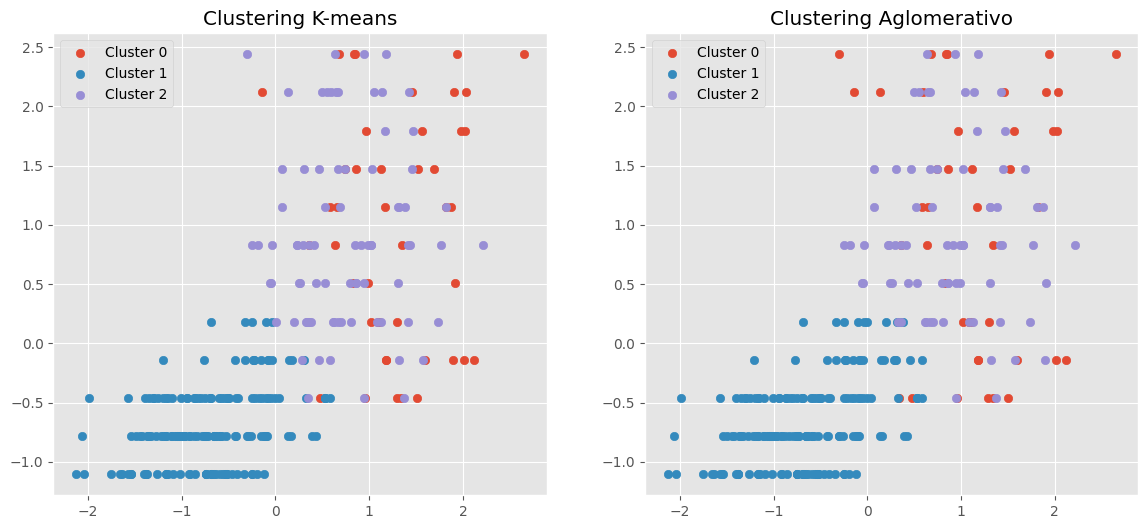

In [ ]:
def map_labels_reverse(agglo_labels, kmeans_labels, k):
    # Crear una matriz de conteo de coincidencias de etiquetas
    cost_matrix = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            cost_matrix[i, j] = np.sum((agglo_labels == i) & (kmeans_labels == j))

    # Encontrar la mejor asignación de clusters usando el algoritmo húngaro
    row_ind, col_ind = linear_sum_assignment(-cost_matrix)
    label_mapping = dict(zip(row_ind, col_ind))

    # Reasignar etiquetas basadas en la mejor asignación
    mapped_agglo_labels = np.array([label_mapping[label] for label in agglo_labels])
    return mapped_agglo_labels

# Datos de ejemplo y clustering
X = customer_3D
k = 3

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means
kmeans_model_3D = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X_scaled)
labels_3D = kmeans_model_3D.labels_

# Aplicar Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=k)
agglo_labels = agglo_model.fit_predict(X_scaled)

# Aplicar el mapeo de etiquetas
mapped_agglo_labels = map_labels_reverse(agglo_labels, labels_3D, k)

# Creamos un gráfico de dispersión 2D para comparar los resultados
plt.figure(figsize=(14, 6))

# K-means con etiquetas mapeadas
plt.subplot(1, 2, 1)
for i in range(k):
    plt.scatter(X_scaled[labels_3D == i, 0], X_scaled[labels_3D == i, 1], label=f'Cluster {i}')
plt.title('Clustering K-means')
plt.legend()

# Clustering aglomerativo con etiquetas mapeadas
plt.subplot(1, 2, 2)
for i in range(k):
    plt.scatter(X_scaled[mapped_agglo_labels == i, 0], X_scaled[mapped_agglo_labels == i, 1], label=f'Cluster {i}')
plt.title('Clustering Aglomerativo')
plt.legend()

plt.show()



Contamos la cantidad de datos que hay por cluster

In [ ]:
def count_cluster_data(kmeans_labels, agglo_labels, k):
    kmeans_counts = np.zeros(k)
    agglo_counts = np.zeros(k)

    for i in range(k):
        kmeans_counts[i] = np.sum(kmeans_labels == i)
        agglo_counts[i] = np.sum(agglo_labels == i)

    return kmeans_counts, agglo_counts

k = 3  # Número de clusters

# Ajuste de K-means y clustering aglomerativo, y el mapeo de etiquetas ya hecho
kmeans_model_3D = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X_scaled)
labels_3D = kmeans_model_3D.labels_

agglo_model = AgglomerativeClustering(n_clusters=k)
agglo_labels = agglo_model.fit_predict(X_scaled)

mapped_agglo_labels = map_labels_reverse(agglo_labels, labels_3D, k)

# Contar la cantidad de datos en cada cluster
kmeans_counts, agglo_counts = count_cluster_data(labels_3D, mapped_agglo_labels, k)

print("K-means cluster counts:", kmeans_counts)
print("Agglomerative cluster counts:", agglo_counts)

K-means cluster counts: [ 44. 165.  81.]
Agglomerative cluster counts: [ 43. 173.  74.]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Se obtuvieron resultados muy similares entre el método de Clustering con K-Means y Clustering Aglomerativo.

## 4. Características significativas

Eliminamos la columna marital status del dataframe para encontrar los centroides

In [ ]:
customer_features = selected.drop('Marital_Status', axis=1)
customer_features.head()


,Income,NumStorePurchases,MntWines
0,50437.0,8.0,370.0
1,31878.0,4.0,23.0
2,17688.0,2.0,2.0
3,40706.0,4.0,59.0
4,15287.0,2.0,1.0


Normalizamos los datos

In [ ]:
#Normalización de los datos
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

customer_features=minmax_norm(customer_features)
customer_features

,Income,NumStorePurchases,MntWines
0,0.438262,0.545455,0.264516
1,0.248829,0.181818,0.015771
2,0.103990,0.000000,0.000717
3,0.338937,0.181818,0.041577
4,0.079483,0.000000,0.000000
...,...,...,...
285,0.642241,0.454545,0.342652
286,0.681763,0.363636,0.268100
287,0.427565,0.090909,0.027957
288,0.323463,0.181818,0.048029


Ajustamos el modelo

In [ ]:
kmeans_model = KMeans(n_clusters=3).fit(customer_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Etiquetas asignadas a puntos

In [ ]:
customer_3F_labels = kmeans_model.labels_
print(customer_3F_labels)

[2 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 2 1 2 2 1 1 0 2 0 2 1 0 0 2 1 0 1 0 1 2 0
 0 0 2 2 0 1 0 1 0 0 2 0 0 0 1 0 1 0 2 0 2 1 0 0 0 0 2 1 0 1 2 0 2 0 2 1 0
 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 2 1 1 0 0 2 0 2 0 0 0 0 0
 1 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 2 2 1 0 2 0 0 1 2 0 2 0 0 0 0 0 2 1 2
 0 1 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 2 0 0 2 0 2 2 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 2 0 1 2 0 2 0 2 0 0 0 0 1 1 1 1 0 0 1 2 0 0 0 2 2 2 1 0 0 1 0
 0 2 0 1 1 1 0 0 0 0 0 0 2 2 0 0 2 2 0 2 0 1 0 0 0 0 1 0 0 2 1 1 0 1 1 0 0
 2 2 0 2 1 0 2 2 2 0 2 1 0 2 0 0 2 2 0 1 1 0 2 2 2 2 2 2 0 0 1]


Ahora podemos ver los vectores de los centroides.

In [ ]:
centroides_3F = kmeans_model.cluster_centers_
print(centroides_3F)

[[0.29748797 0.11735537 0.04189421]
 [0.67026549 0.81454545 0.48014337]
 [0.62086318 0.40363636 0.38120908]]


Añadimos las etiquetas obtenidas al conjunto de datos.

In [ ]:
customer_features['cluster'] = customer_3F_labels
customer_features.sample(5)

,Income,NumStorePurchases,MntWines,cluster
180,0.748915,0.727273,0.345520,1
92,0.017913,0.000000,0.005735,0
99,0.459636,0.727273,0.202151,1
288,0.323463,0.181818,0.048029,0
33,0.420390,0.000000,0.006452,0


In [ ]:
cluster_0 = customer_features[customer_features['cluster'] == 0]
cluster_0.drop('cluster', axis=1).describe()

,Income,NumStorePurchases,MntWines
count,165.000000,165.000000,165.000000
mean,0.297488,0.117355,0.041894
std,0.118537,0.095250,0.053113
min,0.000000,0.000000,0.000000
25%,0.211787,0.000000,0.007168
50%,0.300395,0.090909,0.021505
75%,0.390514,0.181818,0.053763
max,0.566474,0.363636,0.270251


In [ ]:
cluster_1 =  customer_features[ customer_features['cluster'] == 1]
cluster_1.drop('cluster', axis=1).describe()

,Income,NumStorePurchases,MntWines
count,50.000000,50.000000,50.000000
mean,0.670265,0.814545,0.480143
std,0.129826,0.133659,0.222563
min,0.382287,0.545455,0.091756
25%,0.581437,0.727273,0.300896
50%,0.662079,0.818182,0.436201
75%,0.752013,0.909091,0.675806
max,1.000000,1.000000,0.939068


In [ ]:
cluster_2 =  customer_features[ customer_features['cluster'] == 2]
cluster_2.drop('cluster', axis=1).describe()

,Income,NumStorePurchases,MntWines
count,75.000000,75.000000,75.000000
mean,0.620863,0.403636,0.381209
std,0.122116,0.128773,0.227130
min,0.393116,0.181818,0.086022
25%,0.518985,0.318182,0.211111
50%,0.622245,0.363636,0.326165
75%,0.715732,0.545455,0.493548
max,0.908912,0.636364,1.000000


#falta ayudaaaaa porfaaavorrrr

---



### Observaciones más cercanas a cada centroide.
Podemos identificar la observación más representativa de cada clúster buscando la más cercana a cada centroide usando pairwise_distances_argmin_min, que nos da el índice de estas observaciones.

In [ ]:
closest, _ = pairwise_distances_argmin_min(centroides_3F, customer_features.drop('cluster', axis=1))
closest

array([121,  58, 285])

Observación más cercana al centroide del cluster 0

In [ ]:
print(tabulate(customer_features.iloc[[121]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   Income |   NumStorePurchases |   MntWines |   cluster |
|-----+----------+---------------------+------------+-----------|
| 121 | 0.309143 |           0.0909091 |   0.027957 |         0 |


Observación más cercana al centroide del cluster 1

In [ ]:
print(tabulate(customer_features.iloc[[58]], headers = 'keys', tablefmt = 'orgtbl'))

|    |   Income |   NumStorePurchases |   MntWines |   cluster |
|----+----------+---------------------+------------+-----------|
| 58 | 0.772116 |            0.818182 |   0.556272 |         1 |


Observación más cercana al centroide del cluster 2

In [ ]:
print(tabulate(customer_features.iloc[[285]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   Income |   NumStorePurchases |   MntWines |   cluster |
|-----+----------+---------------------+------------+-----------|
| 285 | 0.642241 |            0.454545 |   0.342652 |         2 |


### Características representativas de las especies de flores iris

En promedio, las observaciones del cluster_0 tienen las siguientes características que las representan:

* sepal-length = 5.0 cm
* sepal-width	= 3.4 cm
* petal-length	= 1.5 cm
* petal-width = 0.2 cm

Se pueden verificar estos datos para los demás clusters.

### Predicción para nueva observación

Suponiendo que encontramos una nueva flor (independiente de los datos que teniamos) con las siguientes características:

sepal-length = 6.22,  sepal-width = 4.3,  petal-length = 1.4, petal-width = 0.4.

Nos gustaría saber dentro de cuál grupo se podria clasificar.

In [ ]:
# Con el modelo entrenado puedo hacer predicciones para
# observaciones nuevas
X_new = np.array([[6.22,4.3,1.4,0.4]]) #nueva observación

new_labels = kmeans_model.predict(X_new)
print(new_labels)

[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

